# Case Study : Fashion Class Classification

## Problem Statement


Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

## Importing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('../data/fashion-mnist_train.csv', sep = ',')
fashion_test_df = pd.read_csv('../data/fashion-mnist_test.csv', sep = ',')

In [3]:
fashion_train_df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
# Creating arrays to visualize data
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [8]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

3.0

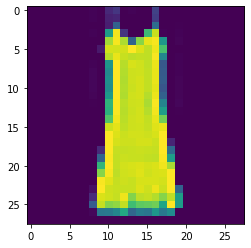

In [9]:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28));
label = training[i, 0]
label

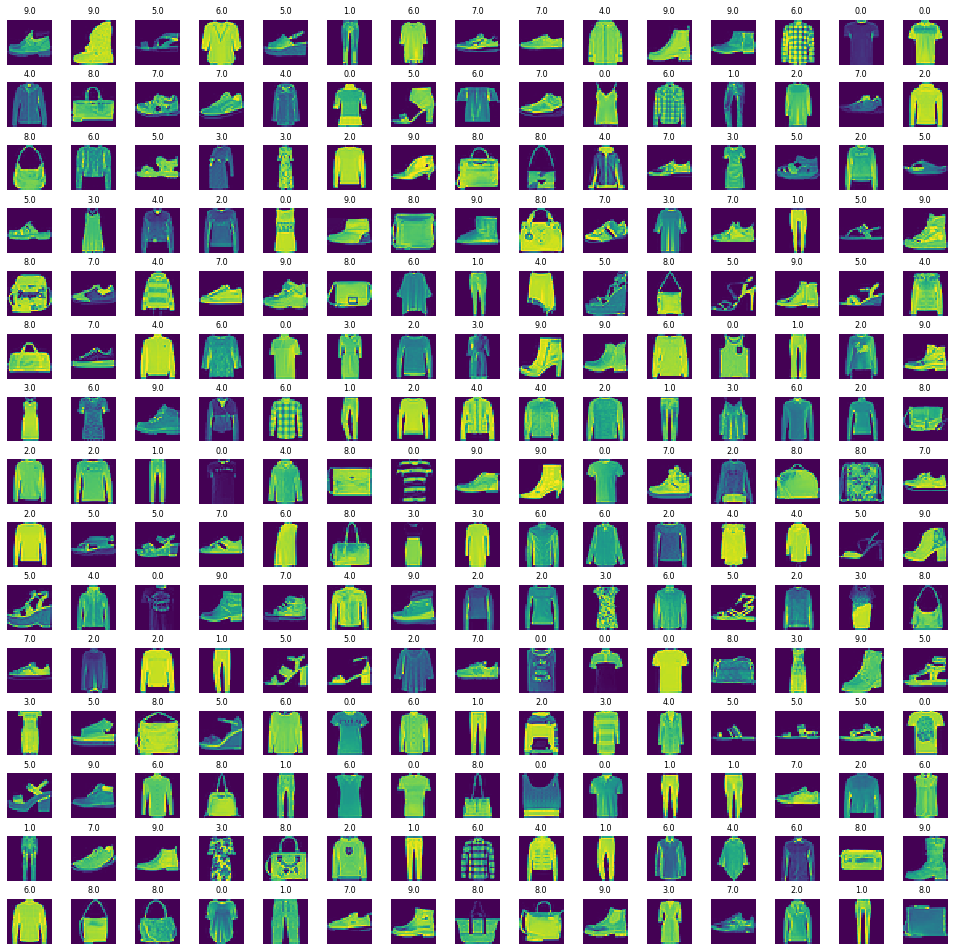

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## TRAINING MODEL

In [13]:
# Prepare the training and testing dataset 
X_train = training[:, 1:]/255 #Normalizing
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [19]:
X_train.shape

(48000, 784)

In [20]:
y_train.shape

(48000,)

In [21]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [22]:
X_train.shape

(48000, 28, 28, 1)

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
X_validate.shape

(12000, 28, 28, 1)

In [27]:
# import sys
# !conda install --yes --prefix {sys.prefix} keras

In [28]:
import keras # open source Neural network library madke our life much easier

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

Using TensorFlow backend.


In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
cnn_model = Sequential()

# Relu Layer
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\morev\Desktop\case-studies\env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\morev\Desktop\case-studies\env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  if __name__ == '__main__':
C:\Users\morev\Desktop\case-studies\env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  # Remove the CWD from sys.path while we load stuff.


In [32]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [33]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Users\morev\Desktop\case-studies\env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 47s 978us/step - loss: 0.9129 - accuracy: 0.6719 - val_loss: 0.4909 - val_accuracy: 0.8264
Epoch 2/50
48000/48000 [==============================] - 46s 968us/step - loss: 0.4690 - accuracy: 0.8330 - val_loss: 0.4186 - val_accuracy: 0.8533
Epoch 3/50
48000/48000 [==============================] - 47s 971us/step - loss: 0.4071 - accuracy: 0.8580 - val_loss: 0.3756 - val_accuracy: 0.8690
Epoch 4/50
48000/48000 [==============================] - 47s 970us/step - loss: 0.3778 - accuracy: 0.8679 - val_loss: 0.3510 - val_accuracy: 0.8796
Epoch 5/50
48000/48000 [==============================] - 47s 978us/step - loss: 0.3551 - accuracy: 0.8753 - val_loss: 0.3372 - val_accuracy: 0.8831
Epoch 6/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3366 - accuracy: 0.8809 - val_loss: 0.3280 - val_accuracy: 0.8837
Epoch 7/50
48000/48000 [==============================] - 

# Evaluating Model 

In [34]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 278us/step
Test Accuracy : 0.917


In [35]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

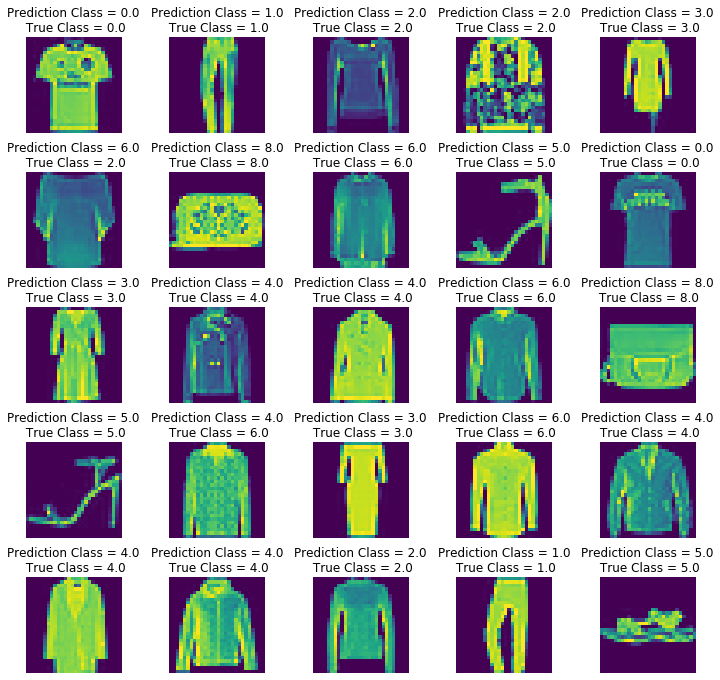

In [36]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

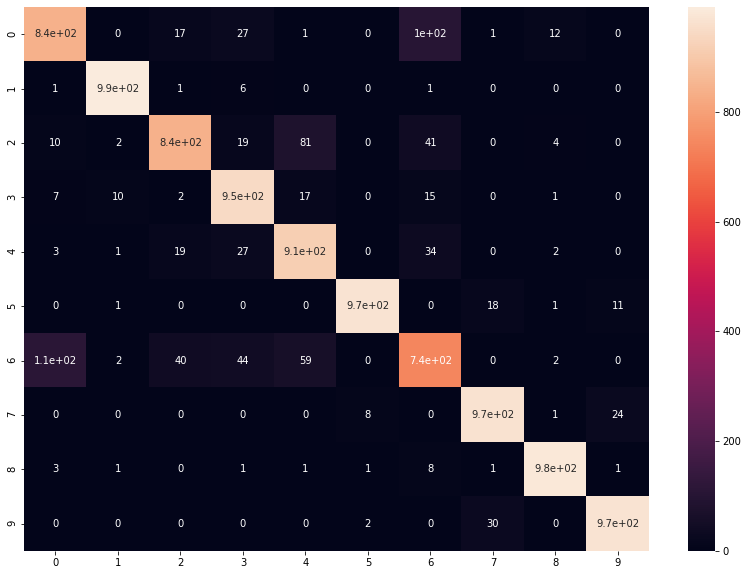

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [38]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.84      0.85      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.91      0.84      0.88      1000
     Class 3       0.88      0.95      0.92      1000
     Class 4       0.85      0.91      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.79      0.74      0.76      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

